# Frequentist Inference Case Study - Part A 

<div style="text-align: right"><i><font size="2"> by: <a href="https://www.linkedin.com/in/sonjoy-das-9b323213/" target="_parent">Sonjoy Das, PhD</a></font></i></div>

***

## 1. Learning objectives

Welcome to part A of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. Frequentist inference is the process of deriving conclusions about an underlying distribution via the observation of data. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

## Prerequisites

To be able to complete this notebook, you are expected to have a basic understanding of:
* what a random variable is (p.400 of Professor Spiegelhalter's *The Art of Statistics, hereinafter AoS*)
* what a population, and a population distribution, are (p. 397 of *AoS*)
* a high-level sense of what the normal distribution is (p. 394 of *AoS*)
* what the t-statistic is (p. 275 of *AoS*)

Happily, these should all be concepts with which you are reasonably familiar after having read ten chapters of Professor Spiegelhalter's book, *The Art of Statistics*.

We'll try to relate the concepts in this case study back to page numbers in *The Art of Statistics* so that you can focus on the Python aspects of this case study. The second part (part B) of this case study will involve another, more real-world application of these tools. 

For this notebook, we will use data sampled from a known normal distribution. This allows us to compare our results with theoretical expectations.

## 2. An introduction to sampling from the normal distribution

First, let's explore the ways we can generate the normal distribution. While there's a fair amount of interest in [sklearn](https://scikit-learn.org/stable/) within the machine learning community, you're likely to have heard of [scipy](https://docs.scipy.org/doc/scipy-0.15.1/reference/index.html) if you're coming from the sciences. For this assignment, you'll use [scipy.stats](https://docs.scipy.org/doc/scipy-0.15.1/reference/tutorial/stats.html) to complete your work. 

This assignment will require some digging around and getting your hands dirty (your learning is maximized that way)! You should have the research skills and the tenacity to do these tasks independently, but if you struggle, reach out to your immediate community and your mentor for help. 

In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt
# from scipy.special import gamma

# For Q11 that requires integration of normal pdf
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html
from scipy.integrate import quad

# For Q12: Related to error function, i.e., integration of standard normal pdf
# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erf.html
from scipy.special import erf

# For Q15: Related to standard error of mean
# Source: https://www.codegrepper.com/code-examples/python/sample+margin+of+error+estimate+python+scipy
from scipy.stats import sem

# For Q15
# https://towardsdatascience.com/plot-organization-in-matplotlib-your-one-stop-guide-if-you-are-reading-this-it-is-probably-f79c2dcbc801
from matplotlib.gridspec import GridSpec

**Q1:** Call up the documentation for the `norm` function imported above. (Hint: that documentation is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)). What is the second listed method?

In [2]:
help(norm)

Help on norm_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.norm_gen object>
    A normal continuous random variable.
    
    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.
    
    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf

> **A1:**  The second listed method from output of `help(norm)` shows the following:
>
>    **`pdf(x, loc=0, scale=1)`**  `Probability density function.`
>
> This can bes used to compute the valuem of the probability density function of a normal continuous random variable at any point, $x$, on the real line. The default parameters here are `loc=0`, and `scale=1` (or, mean = 0 and standard deviation = 1).
    

**Q2:** Use the method that generates random variates to draw five samples from the standard normal distribution. 

> **A2:** We will use the folliwng method to generate the samples:
>
>    **`rvs(loc=0, scale=1, size=1, random_state=None)`**
>
> by changing the default parameters as required.

In [3]:
# draw five samples here
samples5 = norm.rvs(size=5,random_state=100)
samples5

array([-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604,  0.98132079])

**Q3:** What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution. If you want a reminder of the properties of this distribution, check out p. 85 of *AoS*. 

In [4]:
# Calculate and print the mean here, hint: use np.mean()
sample5_mean  = np.mean(samples5)
print(f"The sample mean is {round(sample5_mean,3)}.")

The sample mean is 0.095.


> **A3:** The mean of the 5 samples simulated above is 0.095. As expected, it is off the value of population mean (i.e., 0) for standard normal distribution. This inaccuracy is caused because of using a very small number of samples (of size 5) or because of using a finite number of samples.

**Q4:** What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$. This is just the definition of **standard deviation** given by Professor Spiegelhalter on p.403 of *AoS*. Hint: np.sqrt() and np.sum() will be useful here and remember that numPy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

In [5]:
n = len(samples5)
samples5_std = np.sqrt(np.sum(np.square(samples5 - sample5_mean))/n) 
print(f"The standard deviation of the sample is {round(samples5_std,3)}")
print(f"[Checking]: Using np.std(), the standard deviation of the sample is {round(np.std(samples5),3)}")



The standard deviation of the sample is 1.048
[Checking]: Using np.std(), the standard deviation of the sample is 1.048


In [6]:
samples5_var = np.var(samples5)
print(f"\t[Note 1 - Variance]: The sample variance is {round(samples5_var,3)}")

MSE = np.sum(np.square(samples5 - 0))/n
print(f"\t[Note 2 - MSE]: The average of squares of sample deviations from the population mean is {round(MSE,3)}")

bias = np.sqrt(np.square(sample5_mean-0))
print(f"\t[Note 3 - Bias]: The bias of sample mean relative to population mean is {round(bias,3)}")

if (abs(MSE - (samples5_var + (bias**2)))/MSE) < (10**(-2)):
    print(f"\t[Checking]: MSE = Variance + Bias^2 = {round(samples5_var,3)} + {round(bias**2,3)} = {round(samples5_var + (bias**2),3)}")



	[Note 1 - Variance]: The sample variance is 1.098
	[Note 2 - MSE]: The average of squares of sample deviations from the population mean is 1.107
	[Note 3 - Bias]: The bias of sample mean relative to population mean is 0.095
	[Checking]: MSE = Variance + Bias^2 = 1.098 + 0.009 = 1.107


> **A4:** The standard deviation of the 5 samples simulated above is 1.048. As expected again, it is not equal to the value of population standard deviation (i.e., 1) for standard normal distribution becaus it is estimated by using a limited number of samples (of size 5). Note that the sample variance, 1.098, is **less than** the average of squares of sample deviations from the population mean (i.e., 0) which is called MSE and turns out to be 1.107. Sample variance is less than MSE because of the relationship $MSE = Variance + Bias^2$ associated with bias-variance trade-off concept.

Here we have calculated the actual standard deviation of a small data set (of size 5). But in this case, this small data set is actually a sample from our larger (infinite) population. In this case, the population is infinite because we could keep drawing our normal random variates until our computers die! 

In general, the sample mean we calculate will not be equal to the population mean (as we saw above). A consequence of this is that the sum of squares of the deviations from the _population_ mean (which is related to MSE as we defined above) will be bigger than the sum of squares of the deviations from the _sample_ mean. In other words, the sum of squares of the deviations from the _sample_ mean is too small to give an unbiased estimate of the _population_ variance. An example of this effect is given [here](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). Scaling up our estimate of the variance by the factor $n/(n-1)$ gives an unbiased estimator of the population variance. This factor is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The consequence of this is that the $n$ in the denominator is replaced by $n-1$.

You can see Bessel's correction reflected in Professor Spiegelhalter's definition of **variance** on p. 405 of *AoS*.

**Q5:** If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

In [7]:
samples5_std_best = np.sqrt(np.sum(np.square(samples5 - sample5_mean))/(n-1)) 
print(f"\tThe best sample standard deviation using Bessel's correction is {round(samples5_std_best,3)}")

samples5_std_numpy_ddof1 = np.std(samples5,ddof=1)
print(f"\t[Checking]: Using np.std() with ddof = 1, the sample standard deviation is {round(samples5_std_numpy_ddof1,3)}")
print()
print(f"\tSum of squares of the deviations from the population mean vs.  sum of squares of the deviations from the sample mean: {round(np.sum(np.square(samples5 - 0)),3), round(n*samples5_var,3)}")

	The best sample standard deviation using Bessel's correction is 1.172
	[Checking]: Using np.std() with ddof = 1, the sample standard deviation is 1.172

	Sum of squares of the deviations from the population mean vs.  sum of squares of the deviations from the sample mean: (5.535, 5.49)


> **A5:** Using Bessel's correction, the standard deviation of the 5 samples simulated above is 1.172. 

**Q6:** Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

In [8]:
print(f"Using np.std(), the standard deviation of the sample is {round(np.std(samples5),3)}")

Using np.std(), the standard deviation of the sample is 1.048


> **A6:** As shown earlier in Line 5, the default option of numpy's std function yields the standard deviation based on the formula $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$.

**Q7:** Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

In [9]:
print(f"As shown in Line 7 using np.std() with ddof = 1, the unbiased estimator of standard deviation is {round(samples5_std_numpy_ddof1,3)}")


As shown in Line 7 using np.std() with ddof = 1, the unbiased estimator of standard deviation is 1.172


> **A7:** The output of np.std() with ddof = 1 produces the correct result. It can be verified by explicitly computing the unbiased estimator of standard deviation, i.e., $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$. This is also computed in Line 7 and labeled as the `best sample standard deviation using Bessel's correction`.

### Summary of section

In this section, you've been introduced to the scipy.stats package and used it to draw a small sample from the standard normal distribution. You've calculated the average (the mean) of this sample and seen that this is not exactly equal to the expected population parameter (which we know because we're generating the random variates from a specific, known distribution). You've been introduced to two ways of calculating the standard deviation; one uses $n$ in the denominator and the other uses $n-1$ (Bessel's correction). You've also seen which of these calculations np.std() performs by default and how to get it to generate the other.

You use $n$ as the denominator if you want to calculate the standard deviation of a sequence of numbers. You use $n-1$ if you are using this sequence of numbers to estimate the population parameter. This brings us to some terminology that can be a little confusing.

The population parameter is traditionally written as $\sigma$ and the sample statistic as $s$. Rather unhelpfully, $s$ is also called the sample standard deviation (using $n-1$) whereas the standard deviation of the sample uses $n$. That's right, we have the sample standard deviation and the standard deviation of the sample and they're not the same thing!

The sample standard deviation
\begin{equation}
s = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}} \approx \sigma,
\end{equation}
is our best (unbiased) estimate of the population parameter ($\sigma$).

If your dataset _is_ your entire population, you simply want to calculate the population parameter, $\sigma$, via
\begin{equation}
\sigma = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}
\end{equation}
as you have complete, full knowledge of your population. In other words, your sample _is_ your population. It's worth noting that we're dealing with what Professor Spiegehalter describes on p. 92 of *AoS* as a **metaphorical population**: we have all the data, and we act as if the data-point is taken from a population at random. We can think of this population as an imaginary space of possibilities. 

If, however, you have sampled _from_ your population, you only have partial knowledge of the state of your population. In this case, the standard deviation of your sample is not an unbiased estimate of the standard deviation of the population, in which case you seek to estimate that population parameter via the sample standard deviation, which uses the $n-1$ denominator.

Great work so far! Now let's dive deeper.

## 3. Sampling distributions

So far we've been dealing with the concept of taking a sample from a population to infer the population parameters. One statistic we calculated for a sample was the mean. As our samples will be expected to vary from one draw to another, so will our sample statistics. If we were to perform repeat draws of size $n$ and calculate the mean of each, we would expect to obtain a distribution of values. This is the sampling distribution of the mean. **The Central Limit Theorem (CLT)** tells us that such a distribution will approach a normal distribution as $n$ increases (the intuitions behind the CLT are covered in full on p. 236 of *AoS*). For the sampling distribution of the mean, the standard deviation of this distribution is given by

\begin{equation}
\sigma_{mean} = \frac{\sigma}{\sqrt n}
\end{equation}

where $\sigma_{mean}$ is the standard deviation of the sampling distribution of the mean and $\sigma$ is the standard deviation of the population (the population parameter).

This is important because typically we are dealing with samples from populations and all we know about the population is what we see in the sample. From this sample, we want to make inferences about the population. We may do this, for example, by looking at the histogram of the values and by calculating the mean and standard deviation (as estimates of the population parameters), and so we are intrinsically interested in how these quantities vary across samples. 

In other words, now that we've taken one sample of size $n$ and made some claims about the general population, what if we were to take another sample of size $n$? Would we get the same result? Would we make the same claims about the general population? This brings us to a fundamental question: _when we make some inference about a population based on our sample, how confident can we be that we've got it 'right'?_

We need to think about **estimates and confidence intervals**: those concepts covered in Chapter 7, p. 189, of *AoS*.

Now, the standard normal distribution (with its variance equal to its standard deviation of one) would not be a great illustration of a key point. Instead, let's imagine we live in a town of 50,000 people and we know the height of everyone in this town. We will have 50,000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.

In [10]:
mean_population = 172
std_population = 5
size = 50000
pop_heights = norm.rvs(mean_population, std_population, size=size,random_state=100)
print(f"Mean height of {size} people is {round(np.mean(pop_heights),4)}")

Mean height of 50000 people is 172.009


There is a slight difference between this finite sample mean of 50000 people and theoretical mean of 172 cm. But, practically, it is not really significant. So, we will just consider that the average height of 50000 people is 172 cm for the rest of the analysis.

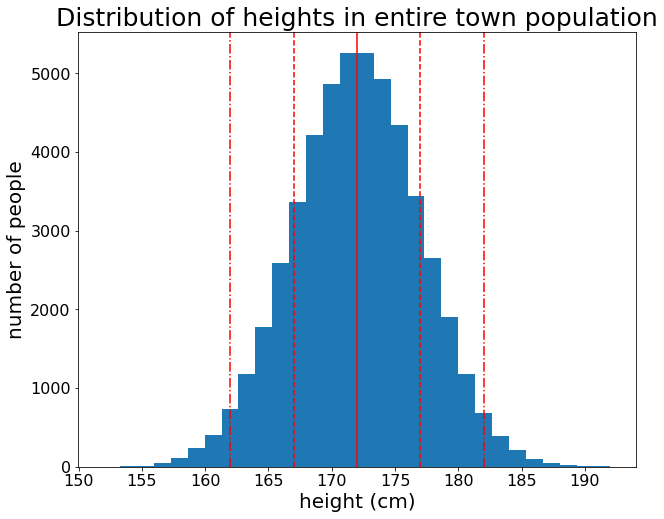

In [11]:
plt.figure(figsize=(10, 8))
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)',fontsize=20)
_ = plt.ylabel('number of people',fontsize=20)
_ = plt.title('Distribution of heights in entire town population',fontsize=25)
_ = plt.axvline(mean_population, color='r')
_ = plt.axvline(mean_population + std_population, color='r', linestyle='--')
_ = plt.axvline(mean_population - std_population, color='r', linestyle='--')
_ = plt.axvline(mean_population + (2*std_population), color='r', linestyle='-.')
_ = plt.axvline(mean_population - (2*std_population), color='r', linestyle='-.')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

Now, 50,000 people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [12]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

Let's say you go out one day and randomly sample 10 people to measure.

In [13]:
seed(47)
n_sample = 10 # size of samples
daily_sample1 = townsfolk_sampler(n_sample)

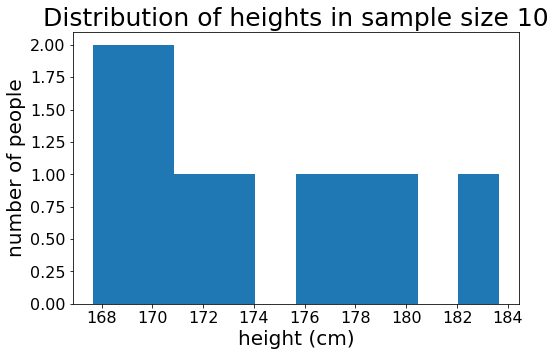

In [14]:
plt.figure(figsize=(8, 5))
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)',fontsize=20)
_ = plt.ylabel('number of people',fontsize=20)
_ = plt.title(f"Distribution of heights in sample size {n_sample}",fontsize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

The sample distribution doesn't resemble what we take the population distribution to be. What do we get for the mean?

In [15]:
np.mean(daily_sample1)

173.84276293185502

And if we went out and repeated this experiment?

In [16]:
daily_sample2 = townsfolk_sampler(n_sample)

In [17]:
np.mean(daily_sample2)

170.84423791539888

**Q8:** Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

> **A8:** See below.

In [18]:
from datetime import date
start_date = date(2020, 1, 1)
end_date = date(2020, 12, 31)
delta = (end_date - start_date)
days = delta.days + 1          # +1 to include the start_date 
print(f"There are {days} days between {start_date} and {end_date}.")

There are 366 days between 2020-01-01 and 2020-12-31.


> Yes, there are 366 days because year 2020 is a leap year.

In [19]:
seed(0)
# take your samples here
n_sample = 10 # size of samples
mean_heights = [np.mean(townsfolk_sampler(n_sample)) for i_days in range(days)]


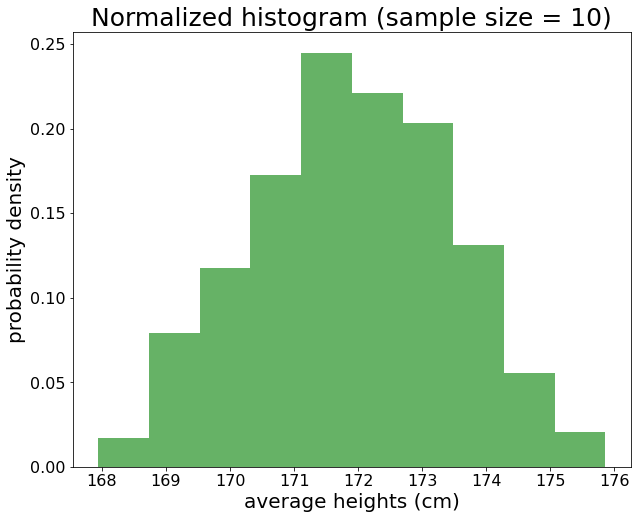

In [20]:
plt.figure(figsize=(10, 8))
plt.hist(mean_heights, bins=10, density=True, facecolor='g', alpha = 0.6)
plt.xlabel('average heights (cm)',fontsize=20)
plt.ylabel('probability density',fontsize=20)
plt.title(f"Normalized histogram (sample size = {n_sample})",fontsize=25)
#plt.xlim([166, 177])

plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be $\sigma / \sqrt n$, which, in this case, should be approximately $5 / \sqrt 10$ = 1.58.

**Q9:** Verify the above results from the CLT.

> **A9:** See below.

In [21]:
print(f"The expected mean of the average heights is {round(np.mean(mean_heights),2)} cm for sample size of {n_sample}.")

The expected mean of the average heights is 171.9 cm for sample size of 10.


> This value of mean is close to the population mean of 172 cm.

In [22]:
print(f"The sample standard deviation of the average heights is {round(np.std(mean_heights,ddof=1),2)} cm for sample size of {n_sample}.")

The sample standard deviation of the average heights is 1.55 cm for sample size of 10.


> This value of sample standard deviation is quite close to $\sigma / \sqrt n$, which is approximately 5/sqrt(10) cm = 1.58 cm.

In [23]:
min(mean_heights), max(mean_heights)

(167.94153816428448, 175.86103090707206)

Remember, in this instance, we knew our population parameters, that the average height really is 172 cm and the standard deviation is 5 cm, and we see some of our daily estimates of the population mean were as low as around **167.94** cm and some as high as **175.86** cm.

**Q10:** Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year)! Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

> **A10:** See below.

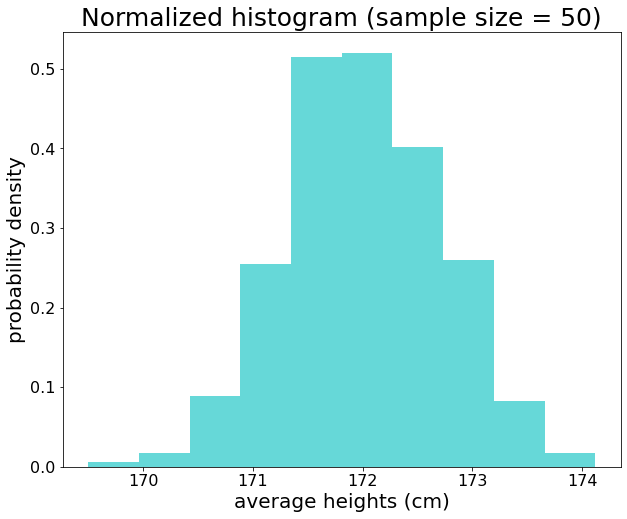

In [24]:
# calculate daily means from the larger sample size here
seed(0)
# take your samples here
n_sample = 50 # size of samples
mean_heights_largerSamples = [np.mean(townsfolk_sampler(n_sample)) for i_days in range(days)]

plt.figure(figsize=(10, 8))
plt.hist(mean_heights_largerSamples, bins=10, density=True, facecolor='c', alpha = 0.6)
plt.xlabel('average heights (cm)',fontsize=20)
plt.ylabel('probability density',fontsize=20)
plt.title(f"Normalized histogram (sample size = {n_sample})",fontsize=25)
# plt.xlim([166, 177])

plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

In [25]:
print(f"The expected mean of the average heights is {round(np.mean(mean_heights_largerSamples),2)} cm for larger sample size of {n_sample}.")
print(f"The standard deviation of the average heights is {round(np.std(mean_heights_largerSamples,ddof=1),2)} cm for larger sample size of {n_sample}.")


The expected mean of the average heights is 172.01 cm for larger sample size of 50.
The standard deviation of the average heights is 0.72 cm for larger sample size of 50.


In [26]:
min(mean_heights_largerSamples), max(mean_heights_largerSamples)

(169.4968020856425, 174.120166944036)

> This value of mean here (for larger sample size of 50) is 172.01 cm. This is also very close to the population mean of 172 cm.

> The major improvement is observed here in terms of the standard deviation which is estimated as 0.72 cm. This is significantly **lower** than the previous case of sample size of 10 and is also consistent with CLT because the standard deviation of the estimator of the average heights per CLT is $\sigma / \sqrt n = 5/\sqrt 50 = 0.70$ cm. 

> This is also evident from the normalized histogram of the average heigths for sample size of 50 because it is **narrower (i.e., less variability or less standard deviation)** than previous normalized histogram obtained for sample size of 10. Here, the range of the daily estimates of the population mean is about **[169.5, 174.1]**. This can be contrasted with the wider range of [167.94, 175.86] for the previous case of sample size of 10.

What we've seen so far, then, is that we can estimate population parameters from a sample from the population, and that samples have their own distributions. Furthermore, the larger the sample size, the narrower are those sampling distributions.

### Normally testing time!

All of the above is well and good. We've been sampling from a population we know is normally distributed, we've come to understand when to use $n$ and when to use $n-1$ in the denominator to calculate the spread of a distribution, and we've  seen the Central Limit Theorem in action for a sampling distribution. All seems very well behaved in Frequentist land. But, well, why should we really care?

Remember, we rarely (if ever) actually know our population parameters but we still have to estimate them somehow. If we want to make inferences to conclusions like "this observation is unusual" or "my population mean has changed" then we need to have some idea of what the underlying distribution is so we can calculate relevant probabilities. In frequentist inference, we use the formulae above to deduce these population parameters. Take a moment in the next part of this assignment to refresh your understanding of how these probabilities work.

Recall some basic properties of the standard normal distribution, such as that about 68% of observations are within plus or minus 1 standard deviation of the mean. Check out the precise definition of a normal distribution on p. 394 of *AoS*. 

**Q11:** Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

> **A11:** See below.

Normal Distribution (mean,std): (0, 1)
Integration bewteen -inf and 1 --> 0.84


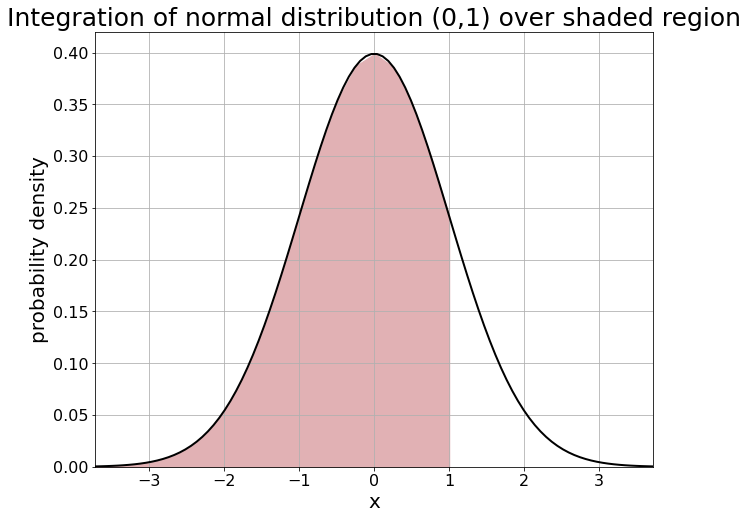

In [27]:
# Source: https://moonbooks.org/Articles/How-to-integrate-a-normal-distribution-in-python-/
#         https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
#         https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html
#
#----------------------------------------------------------------------------------------#
# Plot the standard normal probability density function

mean = 0
std = 1

fig, ax = plt.subplots(figsize=(10, 8))
x_min = norm.ppf(0.0001) # Choose a reasonable lower limit
x_max = norm.ppf(0.9999) # Choose a reasonable upper limit
ptx = np.linspace(x_min, x_max, 100)
pty = norm.pdf(ptx,mean,std)
ax.plot(ptx, pty, 'k-', lw=2, alpha=1.0);

# Now, in the same plot, please also superimpose the intergration area/surface.

#----------------------------------------------------------------------------------------#
# Integration between x1 and x2

def normal_distribution_function(x,mean,std):
    value = norm.pdf(x,mean,std)
    return value

# Defining a negative infinite integer
# Source: https://www.geeksforgeeks.org/python-infinity/
x1 = float('-inf') # Integrating from -inf
x2 = 1

# x1 = 0 # Integrating from 0 
#       # [Recall: Area under the curve between -inf to 0 is 0.5 which will add separately]
# res, err = quad(normal_distribution_function, x1, x2, args=(mean,std,))
# res = 0.5 + res # Note: The area under the curve between -inf to 0 is 0.5

res, err = quad(normal_distribution_function, x1, x2, args=(mean,std,)) # scipy.integrate.quad

print(f"Normal Distribution (mean,std): {(mean,std)}")
print(f"Integration bewteen {x1} and {x2} --> {round(res,2)}")


#----------------------------------------------------------------------------------------#
# Plot integration surface

ptx = np.linspace(x_min, x2, 20)
pty = norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#e1b1b4', alpha=1.0);

#----------------------------------------------------------------------------------------#
plt.grid()

plt.xlim(x_min,x_max)
plt.ylim(0,0.42)

plt.title(f"Integration of normal distribution (0,1) over shaded region",fontsize=25)

plt.xlabel(f"x", fontsize=20)
plt.ylabel(f"probability density", fontsize=20)


plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

> Therefore, probability of observing the value 1 or less is 0.84 which is the area under the curve as shown in the above figure.

Calculating this probability involved calculating the area under the curve of the shaded region from -$\infty$ to 1. To put it in mathematical terms, we need to *integrate* the probability density function. We could just add together the known areas of chunks (from -Inf to 0 and then 0 to $+\sigma$ in the example above). One way to do this is to look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.

**Q12:** Use the cdf() function to answer the question above again and verify you get the same answer.

> **A12:** See below.

In [28]:
print(f"Using norm.cdf() function of scipy.stats, the probability of observing the value {x2} or less is {round(norm.cdf(x2),2)}.")


Using norm.cdf() function of scipy.stats, the probability of observing the value 1 or less is 0.84.


In [29]:
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erf.html
Phix2 = (1/2)*(1 + erf(x2/np.sqrt(2))) # scipy.special.erf
print(f"Alternatively, we can compute this probability of observing the value {x2} or less as {round(Phix2,2)} using the error function.")
print()

Alternatively, we can compute this probability of observing the value 1 or less as 0.84 using the error function.



>All the three schemes (direct integration, cdf(), and error function) provide the same result of 0.84. It should be noted that the area under probability density function is 0.84 when the upper limit is (mean + std) and lower limit is -$\infty$.

**Q13:** Using our knowledge of the population parameters for our townsfolks' heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

> **A13:** See below.

In [30]:
mean = 172
std = 5

x1 = float('-inf') # Integrating from -inf
x2 = 177 # Note: mean + 1*std = x2

res, err = quad(normal_distribution_function, x1, x2, args=(mean,std,))

print(f"Normal Distribution (mean,std): {(mean,std)}")
print(f"Integration bewteen {x1} and {x2} -->  {round(res,2)}")

print(f"Using norm.cdf() function of scipy.stats, this value is {round(norm.cdf(x2,mean,std),2)}.")

# Source: https://stackoverflow.com/questions/509994/best-way-to-write-a-python-function-that-integrates-a-gaussian
# Using error function for mean and std
Phix2 = (1/2)*(1 + erf((x2-mean)/(std*np.sqrt(2))))
print(f"Alternatively, using the error function, this value is {round(Phix2,2)} .")


Normal Distribution (mean,std): (172, 5)
Integration bewteen -inf and 177 -->  0.84
Using norm.cdf() function of scipy.stats, this value is 0.84.
Alternatively, using the error function, this value is 0.84 .


> Again, without any surprise, we obtain the same result of 0.84 by using the three different schemes (direct integration, cdf(), and error function).

> This value is again same (0.84) as what we obatined earlier for standard normal distrobution (mean = 0, and std = 1) because 177 is one standard deviation (= 5) away from its mean of 172, i.e., mean + std = 172 + 5 = 177.

**Q14:** Turning this question around — suppose we randomly pick one person and measure their height and find they are 2.00 m tall. How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability. 

> **A14:** See below.

In [31]:
x2 = 200 # Since 2 m = 200 cm
prob_2mOrMore = 1-norm.cdf(x2,mean,std)
print(f"The probability of observing a person with height {x2/100} m or more is {prob_2mOrMore}.  It is about 1 in {round(1/prob_2mOrMore)}.")
print()

The probability of observing a person with height 2.0 m or more is 1.0717590259723409e-08.  It is about 1 in 93304556.



What we've just done is calculate the ***p-value*** of the observation of someone 2.00 m tall (review *p*-values if you need to on p. 399 of *AoS*). We could calculate this probability by virtue of knowing the population parameters. We were then able to use the known properties of the relevant normal distribution to calculate the probability of observing a value at least as extreme as our test value.

We're about to come to a pinch, though. We've said a couple of times that we rarely, if ever, know the true population parameters; we have to estimate them from our sample and we cannot even begin to estimate the standard deviation from a single observation. 

This is very true and usually we have sample sizes larger than one. This means we can calculate the mean of the sample as our best estimate of the population mean and the standard deviation as our best estimate of the population standard deviation. 

In other words, we are now coming to deal with the sampling distributions we mentioned above as we are generally concerned with the properties of the sample means we obtain. 

Above, we highlighted one result from the CLT, whereby the sampling distribution (of the mean) becomes narrower and narrower with the square root of the sample size. We remind ourselves that another result from the CLT is that _even if the underlying population distribution is not normal, the sampling distribution will tend to become normal with sufficiently large sample size_. (**Check out p. 199 of AoS if you need to revise this**). This is the key driver for us 'requiring' a certain sample size, for example you may frequently see a minimum sample size of 30 stated in many places. In reality this is simply a rule of thumb; if the underlying distribution is approximately normal then your sampling distribution will already be pretty normal, but if the underlying distribution is heavily skewed then you'd want to increase your sample size.

**Q15:** Let's now start from the position of knowing nothing about the heights of people in our town.
* Use the random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf()) Recall that the ***margin of error*** is mentioned on p. 189 of the *AoS* and discussed in depth in that chapter). 
* Calculate the 95% Confidence Interval of the mean (***confidence intervals*** are defined on p. 385 of *AoS*) 
* Does this interval include the true population mean?

> **A15:** See below.

In [32]:
# Source: https://www.codegrepper.com/code-examples/python/sample+margin+of+error+estimate+python+scipy

def mean_confidence_interval_z_score(data, confidence=0.95):
    n = len(data)
#     mean_data, SE = np.mean(data), sem(data) # scipy.stats.sem
    mean_data = np.mean(data)
    std_data = np.std(data,ddof=1)
    
    alpha = (1-confidence)/2 # Two sided confidence interval
    z_score = round(norm.ppf(confidence+alpha),2) # Standardized normal distribution
    SE = std_data/np.sqrt(n)
    ME = z_score*SE
    
    l_lim, u_lim = round(mean_data-ME,2), round(mean_data+ME,2)

    return mean_data, std_data, z_score, SE, ME, (l_lim, u_lim)

def print_result(mean_data, std_data, z_score, SE, ME, CI):
    print(f"\t Sample mean: {mean_data}")
    print(f"\t Sample standard deviation: {std_data}")
    print(f"\t Critical z value ot t value: {z_score}")
    print(f"\t Standard error: {SE}")
    print(f"\t Margin of error: {ME}")
    print(f"\t 95% confidence interval of mean_data (using standardized score): {(CI[0], CI[1])}")
    print(f"\t Length the confidence interval: {round(CI[1] - CI[0],2)}")
    print()

def plot_confidence_interval_z_score(sample_size, mean_data,SE,CI):
    fig = plt.figure(figsize=(8, 5))
    x_min = norm.ppf(0.0001,mean_data,SE) # Choose a reasonable lower limit
    x_max = norm.ppf(0.9999,mean_data,SE) # Choose a reasonable upper limit
    ptx = np.linspace(x_min, x_max, 100)
    pty = norm.pdf(ptx,mean_data,SE)
    plt.plot(ptx, pty, 'k-', lw=2, alpha=1.0);
    plt.xlim([167, 181])
    plt.xlabel(f"average heights (cm)",fontsize=20)
    plt.ylabel(f"N(0,1) pdf", fontsize=20)
    plt.title(f"Sample size {sample_size}",fontsize=25)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
#    Plot the CI
    y = 0.01
    plt.plot(CI,(y,y),'o-',color='orange');


Sample size: 10
	 Sample mean: 173.84276293185502
	 Sample standard deviation: 5.436052386805102
	 Critical z value ot t value: 1.96
	 Standard error: 1.719030702229877
	 Margin of error: 3.369300176370559
	 95% confidence interval of mean_data (using standardized score): (170.47, 177.21)
	 Length the confidence interval: 6.74

Sample size: 50
	 Sample mean: 171.47436537956403
	 Sample standard deviation: 4.068041733626471
	 Critical z value ot t value: 1.96
	 Standard error: 0.5753079791994312
	 Margin of error: 1.1276036392308852
	 95% confidence interval of mean_data (using standardized score): (170.35, 172.6)
	 Length the confidence interval: 2.25

Sample size: 300
	 Sample mean: 172.01942085870274
	 Sample standard deviation: 4.8676694532870535
	 Critical z value ot t value: 1.96
	 Standard error: 0.28103502691813986
	 Margin of error: 0.5508286527595542
	 95% confidence interval of mean_data (using standardized score): (171.47, 172.57)
	 Length the confidence interval: 1.1



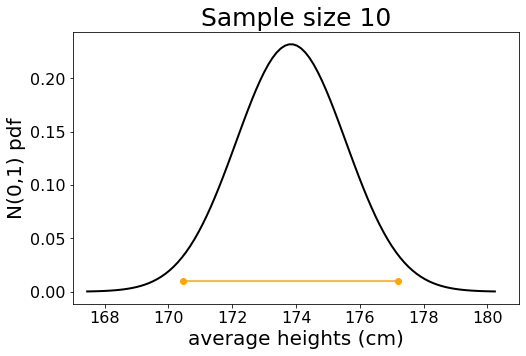

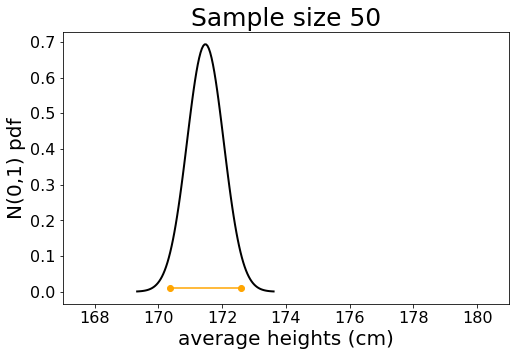

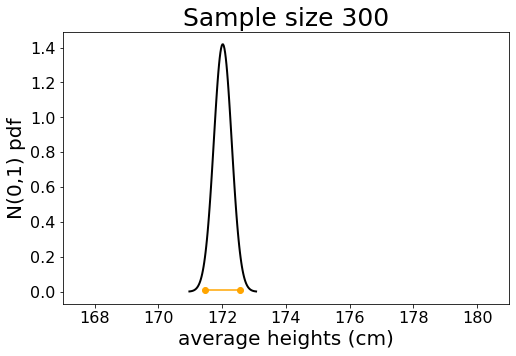

In [33]:
seed(47)
# take your sample now
n = 10 # size of samples
sample = townsfolk_sampler(n)
mean_data10, std_data10, z_score10, SE10, ME10, CI10 = mean_confidence_interval_z_score(sample)
print(f"Sample size: {n}")
print_result(mean_data10, std_data10, z_score10, SE10, ME10, CI10)
plot_confidence_interval_z_score(n,mean_data10,SE10,CI10)

n = 50 # size of samples
sample = townsfolk_sampler(n)
mean_data50, std_data50, z_score50, SE50, ME50, CI50 = mean_confidence_interval_z_score(sample)
print(f"Sample size: {n}")
print_result(mean_data50, std_data50, z_score50, SE50, ME50, CI50)
plot_confidence_interval_z_score(n,mean_data50,SE50,CI50)

n = 300 # size of samples
sample = townsfolk_sampler(n)
mean_data300, std_data300, z_score300, SE300, ME300, CI300 = mean_confidence_interval_z_score(sample)
print(f"Sample size: {n}")
print_result(mean_data300, std_data300, z_score300, SE300, ME300, CI300)
plot_confidence_interval_z_score(n,mean_data300,SE300,CI300)

> We can also use the `norm.interval()` function from the `scipy.stats` library to esstimate the confidence interval. We do this below to verify if our manual calculations above are correct.


In [34]:
seed(47)
n = 10 # size of samples
sample = townsfolk_sampler(n)
CI = norm.interval(alpha=0.95, loc=np.mean(sample), scale=sem(sample))
print(f"Sample size: {n}")
print(f"\t 95% confidence interval using general norm.interval: {round(CI[0],2), round(CI[1],2)}")
print(f"\t Length the confidence interval: {round(CI[1] - CI[0],2)}")

n = 50 # size of samples
sample = townsfolk_sampler(n)
CI = norm.interval(alpha=0.95, loc=np.mean(sample), scale=sem(sample))
print(f"Sample size: {n}")
print(f"\t 95% confidence interval using general norm.interval: {round(CI[0],2), round(CI[1],2)}")
print(f"\t Length the confidence interval: {round(CI[1] - CI[0],2)}")

n = 300 # size of samples
sample = townsfolk_sampler(n)
CI = norm.interval(alpha=0.95, loc=np.mean(sample), scale=sem(sample))
print(f"Sample size: {n}")
print(f"\t 95% confidence interval using general norm.interval: {round(CI[0],2), round(CI[1],2)}")
print(f"\t Length the confidence interval: {round(CI[1] - CI[0],2)}")


Sample size: 10
	 95% confidence interval using general norm.interval: (170.47, 177.21)
	 Length the confidence interval: 6.74
Sample size: 50
	 95% confidence interval using general norm.interval: (170.35, 172.6)
	 Length the confidence interval: 2.26
Sample size: 300
	 95% confidence interval using general norm.interval: (171.47, 172.57)
	 Length the confidence interval: 1.1


> Yes, everything matches perfectly. Let's now move on.

> **REMARKS:** From the three plots above, we note that both the support of the sampling distribution of average height estimators and its 95% Confidence Interval (CI) reduce as we increase the sample size from 10 to 50 to 300. This follows from the CLT, whereby the sampling distribution (of the mean) becomes narrower and narrower with the square root of the increasing sample size. 

> In this example, the population mean is 172 cm which simply happens to be included in the 95% CI shown in the above plots for three different sample sizes. It must be remarked that sampling distributions and CIs are random since they depend on samples that are used to **_estimate_** both the sampling distribution and CI. The 95% CI does **_not_** mean that there is a 95% chance (or 95% probability) that this particular interval contains the population or true mean, although in practice people often provides this **incorrect** interpretation. What 95% CI means is the following. If we repeatedly calculate many such intervals using many different sets of samples of a given size, **then 95% of such intervals should contain the population mean.** In other words, we are **95% confident** that, or in 95% cases, the estimated interval is likely to contain the population mean.


### Confidence Interval Numerical Validation

> Before going to the next step, let us verify what we exlained above. In estimating the confidence interval above, we simply generated one set of uniform random sample of size $n$ from 50000 `pop_heights` using the function `townsfolk_sampler(n)`. If we generate 1000 such sets and estimate 1000 confidence intervals, then approximately 950 estimated confidence intervals would contain the population mean of 172 cm. Let's verify this fact.

In [35]:
seed(1)
n_trials = 1000
n = 300 # size of samples
CI_contains_true_mean = 0
for i in range(n_trials):
    sample = townsfolk_sampler(n)
    _, _, _, _, _, CI = mean_confidence_interval_z_score(sample)
    if CI[0] < mean_population < CI[1]:
        CI_contains_true_mean += 1
print(CI_contains_true_mean)


951


> Yes, 951 (approximately 950) estimated confidence intervals contain the population mean of 172 cm while the remaining ones do not contain the population mean of 172 cm.

**Q16:** Above, we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

> **A16:** To addres this question, let us recall a few statistics that we defined earlier in this notebook. Let

> ${\displaystyle {\bar {x}}={\frac {1}{n}}\sum _{i=1}^{n}x_{i}}$
be the sample mean, and let

> ${\displaystyle s^{2}={\frac {1}{n-1}}\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}$
be the (Bessel-corrected) sample variance. 

> If ${\textstyle x_{1},\ldots ,x_{n}}$ are independently and identically drawn from the normal distribution ${\displaystyle N}(\mu ,\sigma ^{2})$, i.e. this is a sample of size ${\displaystyle n}$ from a normally distributed population with expected mean value ${\displaystyle \mu }$  and variance ${\displaystyle \sigma ^{2}}$ (as we presumed in the example of 'town 47', where heights of the residents are normally distributed with a mean population height of 172 cm and population standard deviation of 5 cm), then ${\displaystyle {\frac {{\bar {x}}-\mu }{\sigma /{\sqrt {n}}}}}$
has a standard normal distribution (i.e. normal with expected mean 0 and variance 1), and the random variable ${\displaystyle {\frac {{\bar {x}}-\mu }{s/{\sqrt {n}}}}}$,
i.e where ${\displaystyle s}$ has been substituted for ${\displaystyle \sigma }$, has a Student's t-distribution with ${\displaystyle n-1}$ degrees of freedom. You can find more details and further reference [here](https://en.wikipedia.org/wiki/Student%27s_t-distribution) (see section `How Student's distribution arises from sampling` in the linked document).

> What we have really done in function `mean_confidence_interval_z_score()` in cell 32 above is that we used the standard normal distribution property of ${\displaystyle {\frac {{\bar {x}}-\mu }{\sigma /{\sqrt {n}}}}}$ to estimate the confidence interval. However, the way it is done is not theoretically correct since we did **_not_** use the population standard deviation ${\displaystyle \sigma}$. Rather, we used the sample standard deviation ${\displaystyle s}$ and used it along with $z$-score. Standard nornmal distribution or $z$-score is used to estimate confidence interval when we know the population standard deviation ${\displaystyle \sigma}$. Nevertheless, the computed confidence interval will **_not_** be a bad estimate if we have relatively a large set of data, say, sample size is more than 30. Using $z$-score essentially results in narrower CI, particularly, for small sample size when compared to CI estimated based on $t$-distribution. Therefore, the first plot above for sample size of 10 may not be acceptable in practice because we should have used the $t$-distribution to estimate a CI for the sample size of 10. For the other two plots (with sample size of 50 and of 300), the CIs based on $z$-score or normal distribution are not likely to be too different from the theoretically correct CIs based on $t$-distribution. This is what we will see next. The CIs based on $t$-distribution will be relatively wider, particularly, for small sample size.

**Q17:** Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

> **A17:** See below.

In [36]:
def mean_confidence_interval_t_score(data, confidence=0.95):
    n = len(data)
    mean_data = np.mean(data)
    std_data = np.std(data,ddof=1)
    
    alpha = (1-confidence)/2 # Two sided confidence interval
    t_score = round(t.ppf(confidence+alpha, n-1),2) # Standardized t-distribution
    SE = std_data/np.sqrt(n)
    ME = t_score*SE
    
    l_lim, u_lim = round(mean_data-ME,2), round(mean_data+ME,2)
    return mean_data, std_data, t_score, SE, ME, (l_lim, u_lim)


def plot_confidence_interval_t_score(sample_size,mean_data,SE,CI):
    fig = plt.figure(figsize=(8, 5))
    x_min = t.ppf(0.0001,sample_size-1,mean_data,SE) # Choose a reasonable lower limit
    x_max = t.ppf(0.9999,sample_size-1,mean_data,SE) # Choose a reasonable upper limit
    ptx = np.linspace(x_min, x_max, 100)
    pty = t.pdf(ptx,sample_size-1,mean_data,SE)
    plt.plot(ptx, pty, 'k-', lw=2, alpha=1.0)
#    plt.xlim([160, 185])
    plt.xlim([167, 181])
    plt.xlabel(f"average heights (cm)",fontsize=20)
    plt.ylabel(f"t pdf", fontsize=20)
    plt.title(f"Sample size {sample_size}",fontsize=25)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
#    Plot the CI
    y = 0.01
    plt.plot(CI,(y,y),'o-',color='orange');

Sample size: 10
	 Sample mean: 173.84276293185502
	 Sample standard deviation: 5.436052386805102
	 Critical z value ot t value: 2.26
	 Standard error: 1.719030702229877
	 Margin of error: 3.8850093870395215
	 95% confidence interval of mean_data (using standardized score): (169.96, 177.73)
	 Length the confidence interval: 7.77

Sample size: 50
	 Sample mean: 171.47436537956403
	 Sample standard deviation: 4.068041733626471
	 Critical z value ot t value: 2.01
	 Standard error: 0.5753079791994312
	 Margin of error: 1.1563690381908567
	 95% confidence interval of mean_data (using standardized score): (170.32, 172.63)
	 Length the confidence interval: 2.31

Sample size: 300
	 Sample mean: 172.01942085870274
	 Sample standard deviation: 4.8676694532870535
	 Critical z value ot t value: 1.97
	 Standard error: 0.28103502691813986
	 Margin of error: 0.5536390030287355
	 95% confidence interval of mean_data (using standardized score): (171.47, 172.57)
	 Length the confidence interval: 1.1



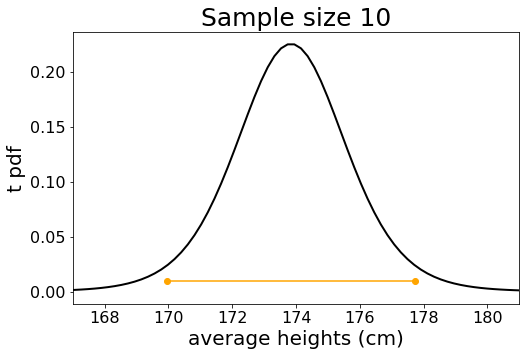

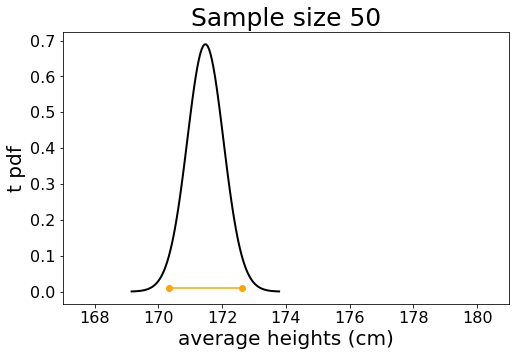

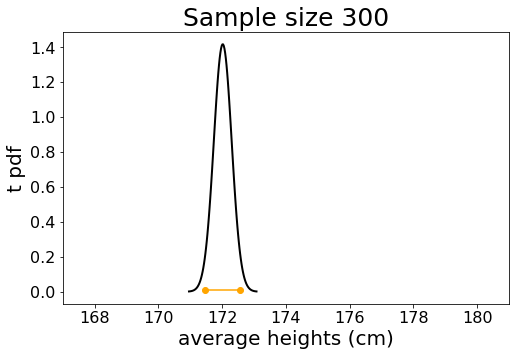

In [37]:
seed(47)
# take your sample now
n = 10 # size of samples
sample = townsfolk_sampler(n)
mean_data10, std_data10, t_score10, SE10, ME10, CI10 = mean_confidence_interval_t_score(sample)
print(f"Sample size: {n}")
print_result(mean_data10, std_data10, t_score10, SE10, ME10, CI10)
plot_confidence_interval_t_score(n,mean_data10,SE10,CI10)

n = 50 # size of samples
sample = townsfolk_sampler(n)
mean_data50, std_data50, t_score50, SE50, ME50, CI50 = mean_confidence_interval_t_score(sample)
print(f"Sample size: {n}")
print_result(mean_data50, std_data50, t_score50, SE50, ME50, CI50)
plot_confidence_interval_t_score(n,mean_data50,SE50,CI50)

n = 300 # size of samples
sample = townsfolk_sampler(n)
mean_data300, std_data300, t_score300, SE300, ME300, CI300 = mean_confidence_interval_t_score(sample)
print(f"Sample size: {n}")
print_result(mean_data300, std_data300, t_score300, SE300, ME300, CI300)
plot_confidence_interval_t_score(n,mean_data300,SE300,CI300)

> As we directly calcuated the confidence interval using `norm.interval()` function from the `scipy.stats` library, we can do the same here to esstimate the confidence interval using `t.interval()` function from the `scipy.stats` library to verify if our manual calculations above are correct or not.

In [38]:
seed(47)
n = 10 # size of samples
sample = townsfolk_sampler(n)
CI = t.interval(alpha=0.95, df=n-1, loc=np.mean(sample), scale=sem(sample))
print(f"Sample size: {n}")
print(f"\t 95% confidence interval using general t.interval: {round(CI[0],2), round(CI[1],2)}")
print(f"\t Length the confidence interval: {round(CI[1] - CI[0],2)}")

n = 50 # size of samples
sample = townsfolk_sampler(n)
CI = t.interval(alpha=0.95, df=n-1, loc=np.mean(sample), scale=sem(sample))
print(f"Sample size: {n}")
print(f"\t 95% confidence interval using general t.interval: {round(CI[0],2), round(CI[1],2)}")
print(f"\t Length the confidence interval: {round(CI[1] - CI[0],2)}")

n = 300 # size of samples
sample = townsfolk_sampler(n)
CI = t.interval(alpha=0.95, df=n-1, loc=np.mean(sample), scale=sem(sample))
print(f"Sample size: {n}")
print(f"\t 95% confidence interval using general t.interval: {round(CI[0],2), round(CI[1],2)}")
print(f"\t Length the confidence interval: {round(CI[1] - CI[0],2)}")


Sample size: 10
	 95% confidence interval using general t.interval: (169.95, 177.73)
	 Length the confidence interval: 7.78
Sample size: 50
	 95% confidence interval using general t.interval: (170.32, 172.63)
	 Length the confidence interval: 2.31
Sample size: 300
	 95% confidence interval using general t.interval: (171.47, 172.57)
	 Length the confidence interval: 1.11


> Great! they are matching perfectly.

> The CIs and sampling distributios above are slightly wider than the previous confidence intervals and sampling distributions based on $z$-score. This is particularly true for smaller sample size of 10 and 50. This reflects the greater uncertainty as we already remarked in response to $\textbf{Q16}$. The CIs for sample size of 300 based on $z$-score and $t$-score are practically same because the sample size is sufficiently large. For this data, the population mean height of 172 cm also happens to be included in the 95% CI for all the three CIs based on $t$-score.

> Let's also highlight the meaning of confidence interval by generating again 1000 samples as we did for $z$-score.

In [39]:
seed(1)
n_trials = 1000
n = 300 # size of samples
CI_contains_true_mean = 0
for i in range(n_trials):
    sample = townsfolk_sampler(n)
    _, _, _, _, _, CI = mean_confidence_interval_t_score(sample)
    if CI[0] < mean_population < CI[1]:
        CI_contains_true_mean += 1
print(CI_contains_true_mean)

954


> Yes, 954 (approximately 950) estimated confidence intervals contain the population mean of 172 cm while the remaining 46 estimated confidence intervals do not contain the population mean of 172 cm.

## 4. Learning outcomes

Having completed this project notebook, you now have hands-on experience:
* sampling and calculating probabilities from a normal distribution
* identifying the correct way to estimate the standard deviation of a population (the population parameter) from a sample
* with sampling distribution and now know how the Central Limit Theorem applies
* with how to calculate critical values and confidence intervals